In [1]:
# https://docs.microsoft.com/en-us/azure/cognitive-services/face/quickstarts/client-libraries?pivots=programming-language-python&tabs=windows

## Info

face_client.face.detect_with_url(url, return_face_id=True, return_face_landmarks=False, return_face_attributes=None, recognition_model='recognition_01', return_recognition_model=False, detection_model='detection_01', custom_headers=None, raw=False, **operation_config)

Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes.

No image will be stored. Only the extracted face feature will be
stored on server. The faceId is an identifier of the face feature and will be used in Face - Identify, Face - Verify, and Face - Find Similar. The stored face feature(s) will expire and be deleted 24 hours after the original detection call.

Optional parameters include faceId, landmarks, and attributes.
Attributes include age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure and noise. Some of the results returned for specific attributes may not be highly accurate.

JPEG, PNG, GIF (the first frame), and BMP format are supported. The
allowed image file size is from 1KB to 6MB.

Up to 100 faces can be returned for an image. Faces are ranked by
face rectangle size from large to small.

For optimal results when querying Face -
Identify, Face - Verify, and Face - Find Similar ('returnFaceId' is true), please use faces that are: frontal, clear, and with a minimum size of 200x200 pixels (100 pixels between eyes).

The minimum detectable face size is 36x36 pixels in an image no
larger than 1920x1080 pixels. Images with dimensions higher than

1920x1080 pixels will need a proportionally larger minimum face size.

Different 'detectionModel' values can be provided. To use and compare
different detection models, please refer to How to specify a detection model | Model | Recommended use-case(s) | | ---------- | -------- | | 'detection_01': | The default detection model for Face - Detect. Recommend for near frontal face detection. For scenarios with exceptionally large angle (head-pose) faces, occluded faces or wrong image orientation, the faces in such cases may not be detected. | | 'detection_02': | Detection model released in 2019 May with improved accuracy especially on small, side and blurry faces. |

Different 'recognitionModel' values are provided. If follow-up
operations like Verify, Identify, Find Similar are needed, please specify the recognition model with 'recognitionModel' parameter. The default value for 'recognitionModel' is 'recognition_01', if latest model needed, please explicitly specify the model you need in this parameter. Once specified, the detected faceIds will be associated with the specified recognition model. More details, please refer to How to specify a recognition model | Model | Recommended use-case(s) | | ---------- | -------- | | 'recognition_01': | The default recognition model for Face - Detect. All those faceIds created before 2019 March are bonded with this recognition model. | | 'recognition_02': | Recognition model released in 2019 March. 'recognition_02' is recommended since its overall accuracy is improved compared with 'recognition_01'. |.

:param url: Publicly reachable URL of an image :type url: str :param return_face_id: A value indicating whether the operation should

return faceIds of detected faces.
:type return_face_id: bool :param return_face_landmarks: A value indicating whether the operation

should return landmarks of the detected faces.
:type return_face_landmarks: bool :param return_face_attributes: Analyze and return the one or more

specified face attributes in the comma-separated string like
"returnFaceAttributes=age,gender". Supported face attributes include
age, gender, headPose, smile, facialHair, glasses and emotion. Note
that each face attribute analysis has additional computational and
time cost.
:type return_face_attributes: list[str or

~azure.cognitiveservices.vision.face.models.FaceAttributeType]
:param recognition_model: Name of recognition model. Recognition model

is used when the face features are extracted and associated with
detected faceIds, (Large)FaceList or (Large)PersonGroup. A recognition
model name can be provided when performing Face - Detect or
(Large)FaceList - Create or (Large)PersonGroup - Create. The default
value is 'recognition_01', if latest model needed, please explicitly
specify the model you need. Possible values include: 'recognition_01',
'recognition_02'
:type recognition_model: str or

~azure.cognitiveservices.vision.face.models.RecognitionModel
:param return_recognition_model: A value indicating whether the

operation should return 'recognitionModel' in response.
:type return_recognition_model: bool :param detection_model: Name of detection model. Detection model is

used to detect faces in the submitted image. A detection model name
can be provided when performing Face - Detect or (Large)FaceList - Add
Face or (Large)PersonGroup - Add Face. The default value is
'detection_01', if another model is needed, please explicitly specify
it. Possible values include: 'detection_01', 'detection_02'
:type detection_model: str or

~azure.cognitiveservices.vision.face.models.DetectionModel
:param dict custom_headers: headers that will be added to the request :param bool raw: returns the direct response alongside the

deserialized response
:param operation_config: :ref:`Operation configuration

overrides msrest:optionsforoperations `.
:return: list or ClientRawResponse if raw=true :rtype: list[~azure.cognitiveservices.vision.face.models.DetectedFace]

or ~msrest.pipeline.ClientRawResponse
:raises:

:class:APIErrorException azure.cognitiveservices.vision.face.models.APIErrorException

## Helpful Documentation

Packages, models, operations, version, Classes (FaceClient, FaceClientConfiguration) - https://docs.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-face/azure.cognitiveservices.vision.face?view=azure-python *

In [1]:
# download if necessary
# !pip install cognitive_face
# !pip install azure.cognitiveservices.vision.face

# install libraries
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person, SnapshotObjectType, OperationStatusType
import pandas as pd 
from PIL import Image

import numpy as np 
from IPython.display import clear_output
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pickle
import requests

# from azure.cognitiveservices.vision.computervision import ComputerVisionClient
# from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

# from msrest.authentication import CognitiveServicesCredentials
# from PIL import Image


## Set up API connection

In [2]:
# Set the FACE_SUBSCRIPTION_KEY environment variable with your key as the value.
# This key will serve all examples in this document.
KEY = os.environ['FACE_SUBSCRIPTION_KEY']

# Set the FACE_ENDPOINT environment variable with the endpoint from your Face service in Azure.
# This endpoint will be used in all examples in this quickstart.
ENDPOINT = os.environ['FACE_ENDPOINT']


In [3]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))


## Examples 
### Detect faces in an image

The following code detects a face in a remote image. It prints the detected face's ID to the console and also stores it in program memory. Then, it detects the faces in an image with multiple people and prints their IDs to the console as well. By changing the parameters in the detect_with_url method, you can return different information with each DetectedFace object.

See the sample code on GitHub for more detection scenarios.

https://github.com/Azure-Samples/cognitive-services-quickstart-code/blob/master/python/Face/FaceQuickstart.py

In [4]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url)
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

# Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from john-f-kennedy---mini-biography.jpg :
cf5ed0d3-e927-4d9a-95dd-0167a1097790



### Display and frame faces¶
The following code outputs the given image to the display and draws rectangles around the faces, using the DetectedFace.faceRectangle property.

In [5]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
detected_faces = face_client.face.detect_with_url(url=single_face_image_url)
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))


# Download the image from the url
response = requests.get(single_face_image_url)
img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(img)
for face in detected_faces:
    draw.rectangle(getRectangle(face), outline='red')

# Display the image in the users default image browser.
img.show()


Drawing rectangle around face... see popup for results.


In [47]:
# test getting desired results with example image
test = face_client.face.detect_with_url(url=single_face_image_url, return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)

# face_client.face.models.Emotion()
for face in test:
  print(face.face_attributes.emotion)

{'additional_properties': {}, 'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 1.0, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}


# Begin Project
The code below tests running the face api to look at results format

In [5]:
# load csv with file names into df 
data_folder = 'emotion_pics/'
emotion_list = os.path.join(data_folder, 'emotion_filelist.csv')
df = pd.read_csv(emotion_list)
df.head()

,id,file_path,emotion,glasses_actual
0,1,emotion_pics/angry/10002.jpg,angry,NaN
1,2,emotion_pics/angry/10016.jpg,angry,NaN
2,3,emotion_pics/angry/10038.jpg,angry,NaN
3,4,emotion_pics/angry/10069.jpg,angry,1.0
4,5,emotion_pics/angry/10105.jpg,angry,1.0


In [10]:
# rename emotions to match api
def rename_emotion(row):
    if row.emotion == 'angry':
        return 'anger'
    elif row.emotion == 'happy':
        return 'happiness'
    elif row.emotion == 'sad':
        return 'sadness'
    else: 
        return row.emotion
    
df['emotion'] = df.apply(lambda row: rename_emotion(row), axis=1)
df.head(2)

,id,file_path,emotion
0,1,emotion_pics/angry/10002.jpg,anger
1,2,emotion_pics/angry/10016.jpg,anger


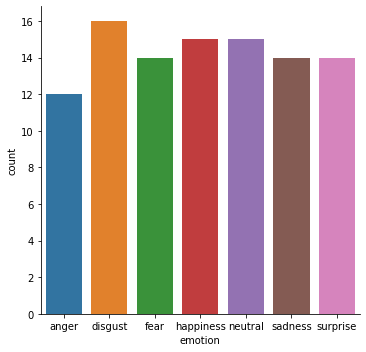

In [11]:
#look at distribution of emotions
sns.catplot(x="emotion", kind="count", data=df)

In [12]:
#save list of picture namees
pic_names = df.file_path

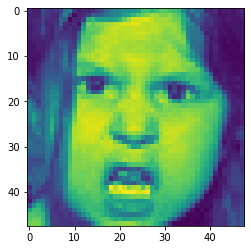

In [13]:
# look at example image 
image0 = Image.open(pic_names[0])
plt.imshow(image0)
plt.show()

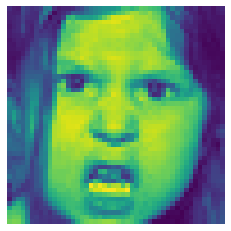

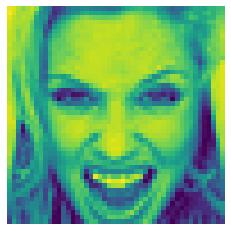

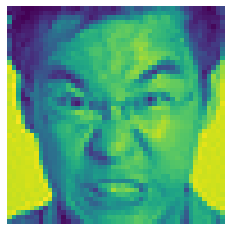

In [14]:
#define a function that wil l display an image in the notebook, with an optional caption
def display_image(image_filename, image_caption=None):
  image = Image.open(image_filename)
  plt.imshow(image)
  plt.axis('off')
  if image_caption != None: #if we need to display a caption for this image
    plt.title(image_caption, size = 'X-large', y=-0.1)
  plt.show()

#display all images
for x in range(3):
  display_image(pic_names[x])

In [34]:
# test2 = face_client.face.detect_with_stream(image = open(pic_names[0],'rb'), return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)

# for face in test2:
#     print(face.face_attributes.age)
#     print(face.face_attributes.gender)
# # headPose may cause error if no results available
#     # print(face.face_attributes.headPose)
#     print(face.face_attributes.smile)
# # facialHair may cause error if no results available
#     # print(face.face_attributes.facialHair)
#     print(face.face_attributes.glasses)
#     print(face.face_attributes.emotion)
#     print(face.face_attributes.emotion.anger)
#     print(face.face_attributes.hair)
#     print(face.face_attributes.makeup)
#     print(face.face_attributes.occlusion)
#     print(face.face_attributes.accessories)
#     print(face.face_attributes.blur)
#     print(face.face_attributes.exposure)
#     print(face.face_attributes.noise)

In [17]:
# function to get all results for image and return as dictionary
def get_results(test2):
    for face in test2:
        #age
        age_result = face.face_attributes.age
    
        #gender
        gender_result = face.face_attributes.gender
    
        #headPose    
        try:
            headPose_result = face.face_attributes.headPose
        except AttributeError:
            headPose_result = 0
    
        #smile
        smile_result = face.face_attributes.smile
    
        #facialhair
        try:
            facialHair_result = face.face_attributes.facialHair
        except AttributeError:
            facialHair_result = 0
        # print(face.face_attributes.facialHair)
        glasses_result = face.face_attributes.glasses.value
        
        #emotion
        anger_result = face.face_attributes.emotion.anger
        #remove contempt because emotion not in our dataset
        contempt_result = face.face_attributes.emotion.contempt
        disgust_result = face.face_attributes.emotion.disgust
        fear_result = face.face_attributes.emotion.fear
        happiness_result = face.face_attributes.emotion.happiness
        neutral_result = face.face_attributes.emotion.neutral
        sadness_result = face.face_attributes.emotion.sadness
        surprise_result = face.face_attributes.emotion.surprise

        #get max emotion name and score
        emotion_dict = face.face_attributes.emotion.as_dict()
        base = -1
        emotion_list = ['anger','disgust','fear','happiness','neutral','sadness','surprise']
        for x  in emotion_list:
            if emotion_dict[x] > base:
                base = emotion_dict[x]
                emotion_result = x
        emotion_score = emotion_dict[x]        
        emotion_result = emotion_result
        
        #hair
        hair_bald_result = face.face_attributes.hair.bald
        hair_invisible_result = face.face_attributes.hair.invisible
        
        #makeup
        eye_makeup_result = face.face_attributes.makeup.eye_makeup
        lip_makeup_result = face.face_attributes.makeup.lip_makeup
        
        #occusion
        forehead_occluded_result = face.face_attributes.occlusion.forehead_occluded
        eye_occluded_result = face.face_attributes.occlusion.eye_occluded
        mouth_occluded_result = face.face_attributes.occlusion.mouth_occluded
        
        #accessories
        accessories_result = face.face_attributes.accessories

        #blur
        blur_level_result = face.face_attributes.blur.blur_level.value
        blur_value_result = face.face_attributes.blur.value

        #exposure
        exposure_level_result = face.face_attributes.exposure.exposure_level.value
        exposure_value_result = face.face_attributes.exposure.value

        #noise
        noise_level_result = face.face_attributes.noise.noise_level.value
        noise_value_result = face.face_attributes.noise.value

        results = {'age_result':age_result, 'gender_result': gender_result, 'headPose_result': headPose_result, 'smile_result': smile_result, 'facialHair_result': facialHair_result, 'glasses_result': glasses_result, 'anger_result': anger_result, 'disgust_result': disgust_result, 'fear_result': fear_result, 'happiness_result': happiness_result, 'neutral_result': neutral_result, 'sadness_result': sadness_result, 'surprise_result': surprise_result, 'emotion_score': emotion_score, 'emotion_result': emotion_result, 'hair_bald_result': hair_bald_result, 'hair_invisible_result': hair_invisible_result, 'eye_makeup_result': eye_makeup_result, 'lip_makeup_result': lip_makeup_result, 'forehead_occluded_result': forehead_occluded_result, 'eye_occluded_result': eye_occluded_result, 'mouth_occluded_result': mouth_occluded_result, 'accessories_result': accessories_result, 'blur_level_result': blur_level_result, 'blur_value_result': blur_value_result, 'exposure_level_result': exposure_level_result, 'exposure_value_result': exposure_value_result, 'noise_level_result': noise_level_result, 'noise_value_result': noise_value_result}
        return results

# function to input image name (path) and return results as dictionary
def run_image(image):
    test2 = face_client.face.detect_with_stream(image = open(image,'rb'), return_face_id=True, return_face_landmarks=True, return_face_attributes=['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion', 'hair', 'makeup', 'occlusion', 'accessories', 'blur', 'exposure', 'noise'], recognition_model='recognition_01', return_recognition_model=True, detection_model='detection_01', custom_headers=None, raw=False)
    file_path = df
    image_results = get_results(test2)
    return image_results

In [18]:
# get column names for emotions_df
new_columns = ['age_result', 'gender_result', 'headPose_result', 'smile_result', 'facialHair_result', 'glasses_result', 'anger_result', 'disgust_result', 'fear_result', 'happiness_result', 'neutral_result', 'sadness_result', 'surprise_result', 'emotion_score', 'emotion_result', 'hair_bald_result', 'hair_invisible_result', 'eye_makeup_result', 'lip_makeup_result', 'forehead_occluded_result', 'eye_occluded_result', 'mouth_occluded_result', 'accessories_result', 'blur_level_result', 'blur_value_result', 'exposure_level_result', 'exposure_value_result', 'noise_level_result', 'noise_value_result']


In [19]:
# create table to hold results form API
emotion_df = pd.DataFrame(columns = new_columns)

In [20]:
"""      
cell runs all images through API
results have been saved to pickle file
uncomment cells below to run again
"""


current_image = 0
for pic in pic_names:
    clear_output(wait=True)
    results = run_image(pic)
    emotion_df.loc[current_image]=results
    current_image += 1
    print('Completed image {} of {}.'.format(current_image, pic_names.shape[0]))
    time.sleep(3)
# emotion_df.head()

Completed image 100 of 100.


,age_result,gender_result,headPose_result,smile_result,facialHair_result,glasses_result,anger_result,disgust_result,fear_result,happiness_result,...,forehead_occluded_result,eye_occluded_result,mouth_occluded_result,accessories_result,blur_level_result,blur_value_result,exposure_level_result,exposure_value_result,noise_level_result,noise_value_result
0,2.0,Gender.female,0,0.000,0,noGlasses,0.996,0.003,0.0,0.000,...,False,False,False,[],Low,0.00,GoodExposure,0.53,Low,0.12
1,30.0,Gender.female,0,0.608,0,noGlasses,0.391,0.000,0.0,0.608,...,False,False,False,[],Low,0.00,GoodExposure,0.60,Low,0.12
2,34.0,Gender.male,0,0.000,0,readingGlasses,1.000,0.000,0.0,0.000,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.41,GoodExposure,0.68,Medium,0.56
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,Gender.male,0,0.591,0,readingGlasses,0.000,0.000,0.0,0.591,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.43,GoodExposure,0.60,Low,0.00


In [21]:
# Look at number of images that did not return results
np.sum(np.isnan(emotion_df['age_result']))

31

In [22]:
# join df and emotion_df
new_df = pd.concat([df, emotion_df], axis = 1)
new_df.head()

,id,file_path,emotion,age_result,gender_result,headPose_result,smile_result,facialHair_result,glasses_result,anger_result,...,forehead_occluded_result,eye_occluded_result,mouth_occluded_result,accessories_result,blur_level_result,blur_value_result,exposure_level_result,exposure_value_result,noise_level_result,noise_value_result
0,1,emotion_pics/angry/10002.jpg,anger,2.0,Gender.female,0,0.000,0,noGlasses,0.996,...,False,False,False,[],Low,0.00,GoodExposure,0.53,Low,0.12
1,2,emotion_pics/angry/10016.jpg,anger,30.0,Gender.female,0,0.608,0,noGlasses,0.391,...,False,False,False,[],Low,0.00,GoodExposure,0.60,Low,0.12
2,3,emotion_pics/angry/10038.jpg,anger,34.0,Gender.male,0,0.000,0,readingGlasses,1.000,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.41,GoodExposure,0.68,Medium,0.56
3,4,emotion_pics/angry/10069.jpg,anger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,emotion_pics/angry/10105.jpg,anger,53.0,Gender.male,0,0.591,0,readingGlasses,0.000,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.43,GoodExposure,0.60,Low,0.00


### Pickle file
Results have been saved to pickle file. To write to file again, uncomment cell below.

In [23]:
# write results to pickle file 

with open('results.pkl', 'wb') as f:
    pickle.dump(new_df, f)

### Open pickle file
To open the pickle file and save it no variable new_df, uncomment cell below

In [24]:
# open results table without running API from pkl file

new_df = pd.read_pickle('results.pkl')

,id,file_path,emotion,age_result,gender_result,headPose_result,smile_result,facialHair_result,glasses_result,anger_result,...,forehead_occluded_result,eye_occluded_result,mouth_occluded_result,accessories_result,blur_level_result,blur_value_result,exposure_level_result,exposure_value_result,noise_level_result,noise_value_result
0,1,emotion_pics/angry/10002.jpg,anger,2.0,Gender.female,0,0.000,0,noGlasses,0.996,...,False,False,False,[],Low,0.00,GoodExposure,0.53,Low,0.12
1,2,emotion_pics/angry/10016.jpg,anger,30.0,Gender.female,0,0.608,0,noGlasses,0.391,...,False,False,False,[],Low,0.00,GoodExposure,0.60,Low,0.12
2,3,emotion_pics/angry/10038.jpg,anger,34.0,Gender.male,0,0.000,0,readingGlasses,1.000,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.41,GoodExposure,0.68,Medium,0.56
3,4,emotion_pics/angry/10069.jpg,anger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,emotion_pics/angry/10105.jpg,anger,53.0,Gender.male,0,0.591,0,readingGlasses,0.000,...,False,False,False,"[{'additional_properties': {}, 'type': <Access...",Medium,0.43,GoodExposure,0.60,Low,0.00


## Testing detection_02
Since 31 of the 100 photos did not have results for model recognition_01. The images are being ran with the second model to see if more images can be recognized. 

## Findings detection_02
This model does not work with face attributes such as emotion.

### Evaluate different models
The different face detection models are optimized for different tasks. See the following table for an overview of the differences.


**TABLE 1**

[detection_01]...........................................................[detection_02]

* Default choice for all face detection operations.......................Released in May 2019 and available optionally in all face detection operations.
* Not optimized for small, side-view, or blurry faces....................Improved accuracy on small, side-view, and blurry faces.
* Returns face attributes (head pose, age,...............................Does not return face attributes.

    emotion, and so on) if they're specified in the detect call.
* Returns face landmarks if they're specified in the detect call.........Does not return face landmarks.

https://docs.microsoft.com/en-us/azure/cognitive-services/face/face-api-how-to-topics/specify-detection-model

In [26]:
def match(row):
    if row.emotion == row.emotion_result:
        return 1
    else: 
        return 0
new_df['predicted'] = new_df.apply(lambda row: match(row), axis=1)
new_df[['emotion','emotion_result','predicted']]

,emotion,emotion_result,predicted
0,anger,anger,1
1,anger,happiness,0
2,anger,anger,1
3,anger,NaN,0
4,anger,happiness,0
5,anger,neutral,0
6,anger,anger,1
7,anger,neutral,0
8,anger,anger,1
9,anger,anger,1


In [31]:
# look at one emotion group
new_df[new_df['emotion']=='angry'][['emotion', 'emotion_result', 'predicted']]

,emotion,emotion_result,predicted


In [28]:
pd.crosstab(index = new_df.emotion, columns = new_df.emotion_result, margins=True, normalize='index')

emotion_result,anger,disgust,fear,happiness,neutral,sadness,surprise
emotion,,,,,,,
anger,0.600000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000
disgust,0.142857,0.357143,0.071429,0.071429,0.071429,0.285714,0.000000
fear,0.000000,0.000000,0.400000,0.100000,0.300000,0.100000,0.100000
happiness,0.000000,0.000000,0.000000,0.900000,0.100000,0.000000,0.000000
neutral,0.000000,0.000000,0.000000,0.250000,0.625000,0.125000,0.000000
sadness,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
surprise,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.909091
All,0.115942,0.072464,0.072464,0.217391,0.231884,0.130435,0.159420


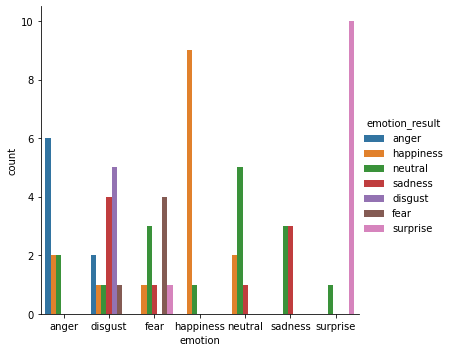

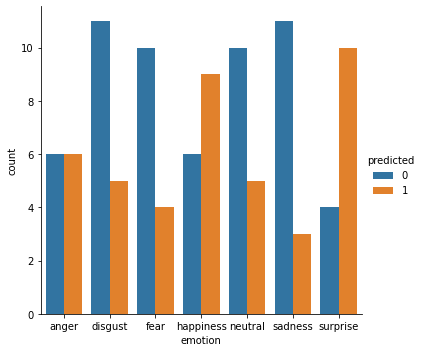

In [29]:
# look at emotion vs recognized emotion

sns.catplot(x = 'emotion', hue='emotion_result', kind='count', data=new_df)
sns.catplot(x = 'emotion', hue='predicted', kind='count', data=new_df)


Surprise and hapiness seem to be the easiest to detect and disgust, the emotion most likely to be mis categorized. 

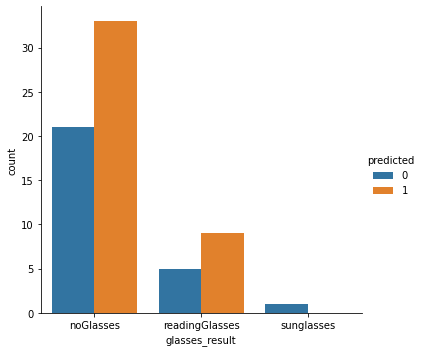

In [30]:
sns.catplot(x = 'glasses_result', hue='predicted', kind='count', data=new_df)

In [ ]:
sns.catplot(x = 'emotion', hue='predicted', kind='count', data=new_df)
